In [1]:
from shapely.geometry import Point, Polygon, LineString, MultiLineString,MultiPoint,MultiPolygon

In [21]:
from shapely.ops import nearest_points

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import math

import pandas as pd
import os
import rasterio
import contextily as ctx

In [4]:
coast_1926=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1926.geojson")
coast_1942=gpd.read_file("../assets/ECY_historical_shorelines_epsg32149/1942.geojson")

In [30]:
coast_1941=gpd.read_file("../assets/f_1941_coastline.geojson")

In [35]:
coast_1953=gpd.read_file("../assets/f_1953_coastline_bay.geojson")
coast_1954=gpd.read_file("../assets/f_1954_coastline.geojson")

In [9]:
coast_1942

,id,YEAR,MONTH,DAY,PHOTO_,Shape_Leng,geometry
0,0,1942,7,0,gra_md,899.055501,"LINESTRING (-124.14352 46.90580, -124.13174 46..."
1,1,1942,7,0,gra_md,2703.027041,"LINESTRING (-124.16218 46.90646, -124.16522 46..."
2,2,1942,7,0,gra_md,1401.059107,"LINESTRING (-124.16178 46.90614, -124.15910 46..."
3,3,1942,7,0,gra_md,1201.276320,"LINESTRING (-124.13082 46.89460, -124.13159 46..."
4,4,1942,7,0,gra_md,602.662308,"LINESTRING (-124.14342 46.90544, -124.13552 46..."
...,...,...,...,...,...,...,...
135,135,1942,8,0,USGS,7022.435033,"LINESTRING (-123.93549 46.08069, -123.93487 46..."
136,136,1942,8,0,USGS,493.174313,"LINESTRING (-123.92304 46.01168, -123.92332 46..."
137,137,1942,8,0,USGS,277.085147,"LINESTRING (-123.92603 46.01194, -123.92625 46..."
138,138,1942,8,0,USGS,201.420617,"LINESTRING (-123.93574 46.08249, -123.93550 46..."


In [2]:
#function to clip the gdf
def clip(polygon_list,gdf_for_clipping):
    polygon=Polygon(polygon_list)
    gdf_after_clipping = gdf_for_clipping.clip(polygon)
    #poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf_1911.crs)
    return gdf_after_clipping

In [11]:
#I only need South Beach area, clip the gdf
polygon_list_westport=[(-124.175972,46.918562),(-123.913222,46.918562),(-123.913222,46.69),(-124.175972,46.69)]

In [1]:
#remove not needed area
coast_1926=clip(polygon_list_westport,coast_1926)
coast_1942=clip(polygon_list_westport,coast_1942)

NameError: name 'clip' is not defined

In [37]:
#function to plot the shoreline

def line_show(gdf):
    gdf = gdf.to_crs(epsg=3857)

    # assuming gdf1 and gdf2 are your GeoDataFrames
    fig, ax = plt.subplots(figsize = (10,10))

    coast_1926_3857 = coast_1926.to_crs(epsg=3857)

    # plot the base map of 1911
    base = coast_1926_3857.plot(ax=ax, color='white', edgecolor='black')

    # plot the first GeoDataFrame

    gdf.plot(ax=base, marker='o', color='black', markersize=5)

    ctx.add_basemap(ax,zoom=11,source=ctx.providers.CartoDB.Positron)

    # Show the plot
    plt.show()

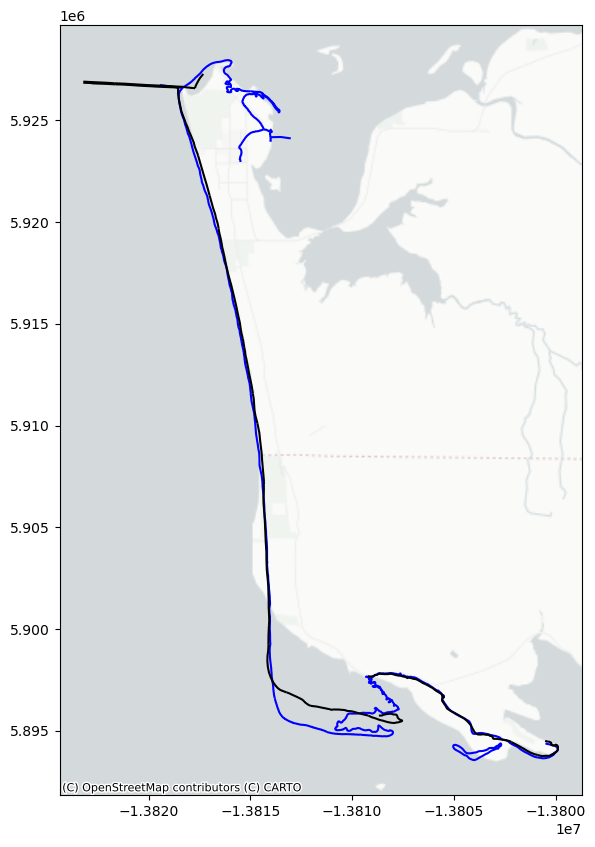

In [17]:
line_show(coast_1942)

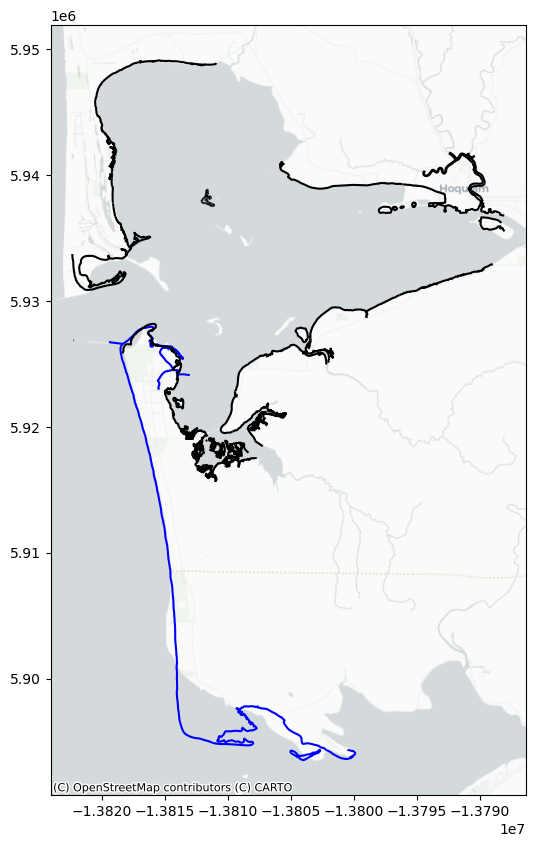

In [31]:
line_show(coast_1941)

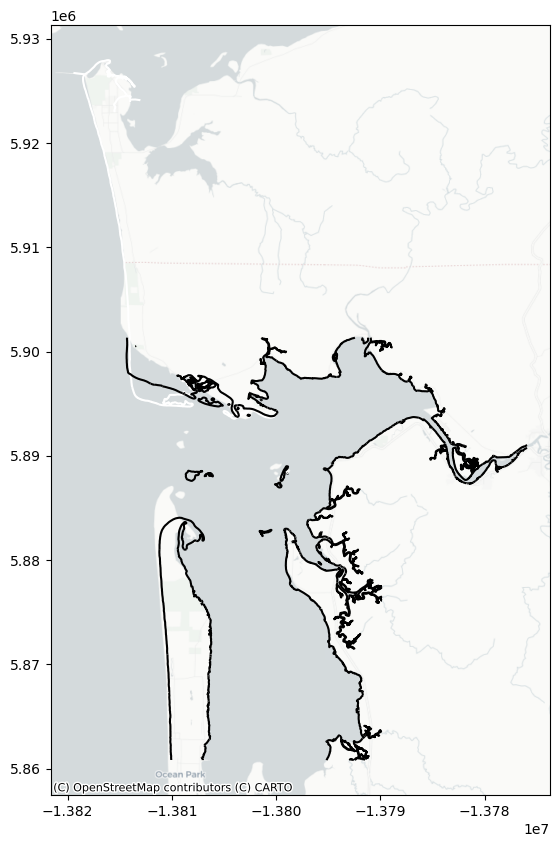

In [38]:
line_show(coast_1953)

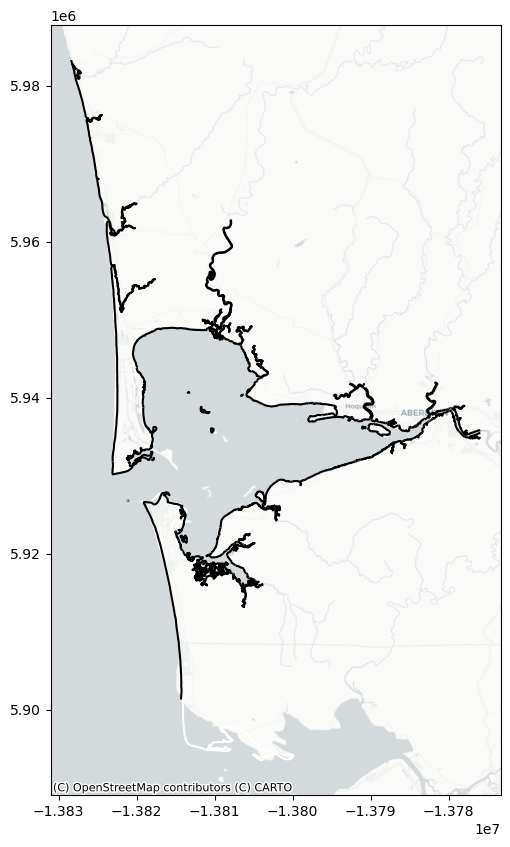

In [39]:
line_show(coast_1954)

In [40]:
coast_1953

,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE,geometry
0,698349.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.04612 46.71639, -124.04..."
1,698350.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.04783 46.71696, -124.04..."
2,698351.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.06547 46.72115, -124.06..."
3,698352.0,15.0,T09634N,A,19500101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.04830 46.71709, -124.04..."
4,698353.0,1.0,T09634N,A,19500101,0,None,0.0,Man-made,SHORELINE,None,S,A,"MULTILINESTRING ((-124.07573 46.72273, -124.07..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,696010.0,15.0,T09638S,A,19500711,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-123.89474 46.51896, -123.89..."
413,696011.0,20.0,T09638S,A,19500711,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-123.89212 46.51447, -123.89..."
414,696008.0,20.0,T09638S,A,19500711,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-123.92343 46.51118, -123.92..."
415,696006.0,15.0,T09638S,A,19500711,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-123.90438 46.49982, -123.90..."


In [41]:
coast_1954

,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE,geometry
0,735210.0,15.0,T09514,A,19500701,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.15864 47.13646, -124.15..."
1,735211.0,15.0,T09514,A,19500701,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.16357 47.12869, -124.16..."
2,735212.0,20.0,T09514,A,19500701,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.16072 47.12813, -124.16..."
3,735213.0,15.0,T09514,A,19500701,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.16003 47.12620, -124.16..."
4,735214.0,15.0,T09514,A,19500701,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.16351 47.12485, -124.16..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,732985.0,15.0,T09521,A,19510601,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.02090 46.87079, -124.02..."
733,732986.0,15.0,T09521,A,19510601,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.01907 46.87008, -124.01..."
734,732987.0,20.0,T09521,A,19510601,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.01987 46.87096, -124.01..."
735,732988.0,20.0,T09521,A,19510601,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.03223 46.87395, -124.03..."


In [42]:
combined_1954=pd.concat([coast_1953,coast_1954],ignore_index=True)
combined_1954

,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE,geometry
0,698349.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.04612 46.71639, -124.04..."
1,698350.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.04783 46.71696, -124.04..."
2,698351.0,20.0,T09634N,A,19500101,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.06547 46.72115, -124.06..."
3,698352.0,15.0,T09634N,A,19500101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.04830 46.71709, -124.04..."
4,698353.0,1.0,T09634N,A,19500101,0,None,0.0,Man-made,SHORELINE,None,S,A,"MULTILINESTRING ((-124.07573 46.72273, -124.07..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,732985.0,15.0,T09521,A,19510601,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.02090 46.87079, -124.02..."
1150,732986.0,15.0,T09521,A,19510601,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A,"MULTILINESTRING ((-124.01907 46.87008, -124.01..."
1151,732987.0,20.0,T09521,A,19510601,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.01987 46.87096, -124.01..."
1152,732988.0,20.0,T09521,A,19510601,0,None,0.0,Natural.Mean High Water,SHORELINE,None,S,A,"MULTILINESTRING ((-124.03223 46.87395, -124.03..."


In [44]:
#clip the westport area of 1954 shoreline
coast_1954=clip(polygon_list_westport,combined_1954)

/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [48]:
#write the 1954 shoreline to geojson
coast_1954.to_file("../assets/ECY_estimated_shorelines/Oct1/1954.geojson", driver='GeoJSON') 

In [45]:
combined_1942=pd.concat([coast_1942,coast_1941],ignore_index=True)
combined_1942

,id,YEAR,MONTH,DAY,PHOTO_,Shape_Leng,geometry,FEATURE_ID,FEATURE,SOURCE_ID,DATA_SOURC,SRC_DATE,HOR_ACC,INFORM,RESOLUTION,ATTRIBUTE,CLASS,F_CODE,EX_METH,EXTRACT_TE
0,13,1942.0,7.0,0.0,grymod,2101.873636,"LINESTRING (-124.04548 46.71541, -124.04492 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,1942.0,7.0,0.0,grymod,1975.618632,"LINESTRING (-124.07548 46.71834, -124.07463 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,1942.0,7.0,0.0,grymod,1198.403558,"LINESTRING (-124.02478 46.72485, -124.02407 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1942.0,7.0,0.0,grymod,800.771773,"LINESTRING (-124.03441 46.72718, -124.03388 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,1942.0,7.0,0.0,grymod,274.454825,"LINESTRING (-124.03782 46.72765, -124.03711 46...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.13759 46.99697, -124.13...",1369108.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A
597,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.13823 46.99681, -124.13...",1369109.0,26.0,T06812A,A,19400101,0,None,0.0,Undetermined.Approximate,SHORELINE,None,S,A
598,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.13694 46.99920, -124.13...",1369111.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A
599,NaN,NaN,NaN,NaN,NaN,NaN,"MULTILINESTRING ((-124.14256 47.00552, -124.14...",1369579.0,15.0,T06812A,A,19400101,0,None,0.0,Natural.Apparent.Marsh Or Swamp,SHORELINE,None,S,A


/usr/local/Caskroom/miniconda/base/envs/geo/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


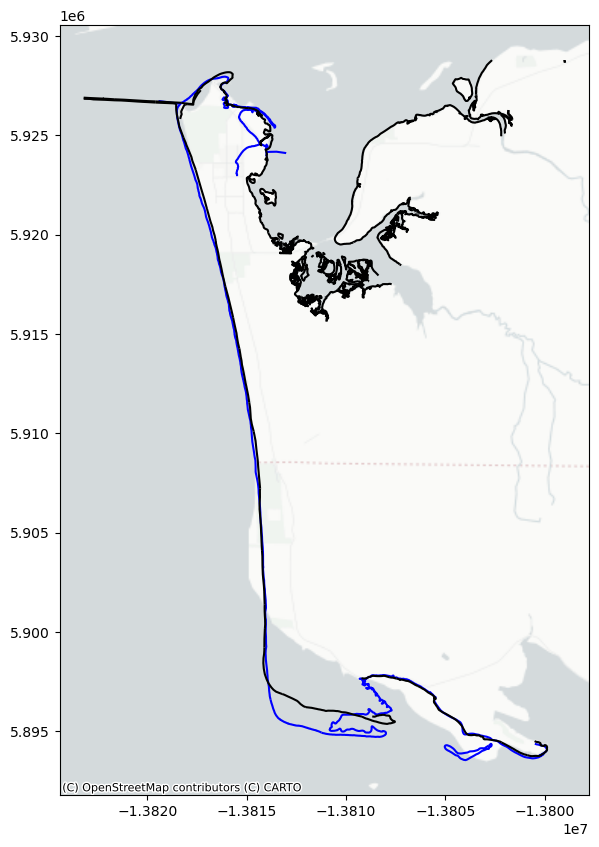

In [34]:
coast_1942=clip(polygon_list_westport,combined_1942)
line_show(coast_1942)

In [50]:
#write the 1942 shoreline to geojson
coast_1942.to_file("../assets/ECY_estimated_shorelines/Oct1/1942.geojson", driver='GeoJSON') 

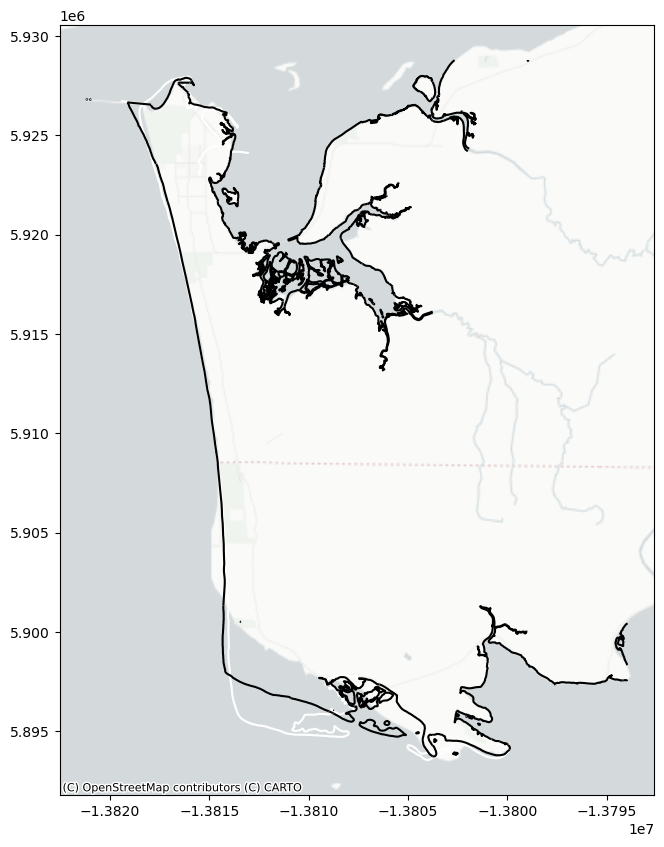

In [52]:
line_show(coast_1954)

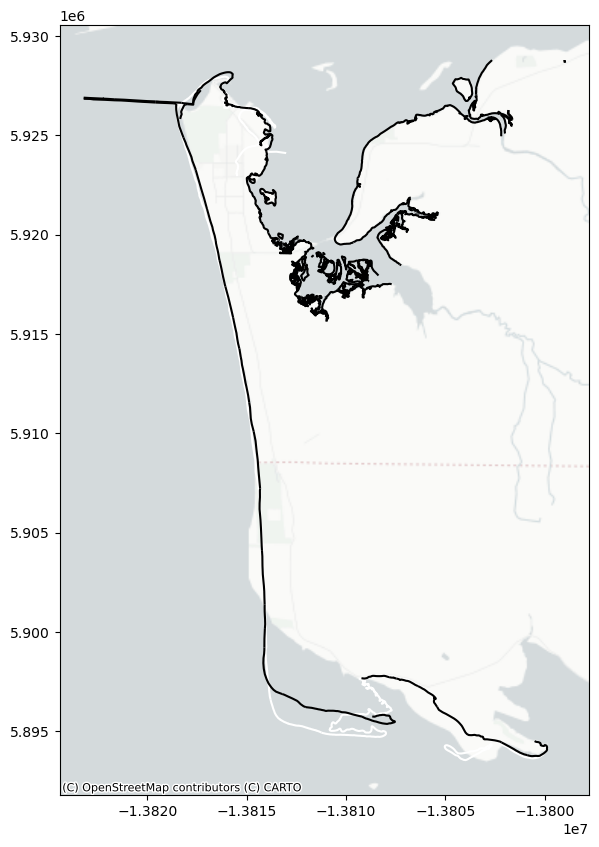

In [53]:
line_show(coast_1942)

In [54]:
#function to plot the shoreline

def line_show_base(gdf,base_gdf):
    gdf = gdf.to_crs(epsg=3857)

    # assuming gdf1 and gdf2 are your GeoDataFrames
    fig, ax = plt.subplots(figsize = (10,10))

    base_gdf_3857 = base_gdf.to_crs(epsg=3857)

    # plot the base map of 1911
    base = base_gdf_3857.plot(ax=ax, color='blue', edgecolor='black')

    # plot the first GeoDataFrame

    gdf.plot(ax=base, marker='o', color='black', markersize=5)

    ctx.add_basemap(ax,zoom=11,source=ctx.providers.CartoDB.Positron)

    # Show the plot
    plt.show()

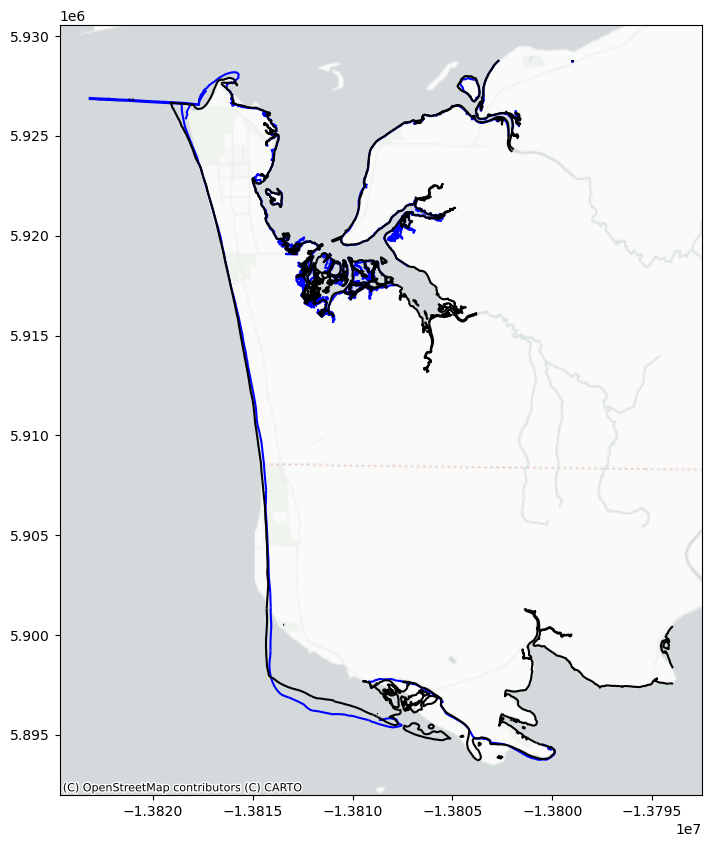

In [55]:
line_show_base(coast_1954,coast_1942)

## Skip the 1942 data I have, I will interpolate based on the 1926 and 1954 survey, and skip the year of 1942

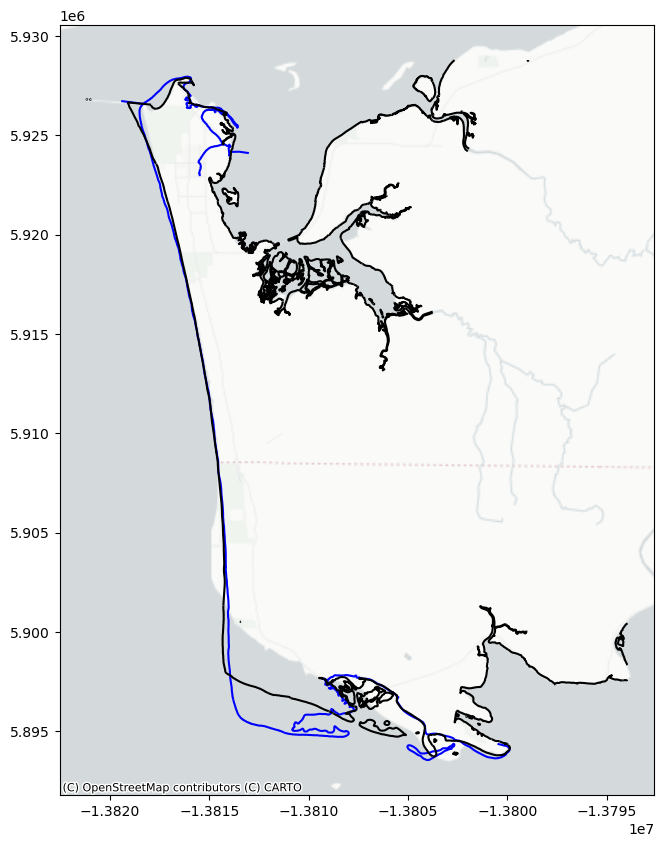

In [56]:
#plot the line of 1926 and 1954 simultaneously on the map
line_show_base(coast_1954,coast_1926)

In [57]:
coast_1926

,id,YEAR,MONTH,Shape_Leng,geometry
28,28,1926,8,3836.721912,"LINESTRING (-123.99290 46.70639, -123.99280 46..."
49,49,1926,8,7970.567350,"LINESTRING (-123.97196 46.70698, -123.97111 46..."
50,50,1926,8,4758.583501,"LINESTRING (-124.04150 46.72820, -124.04162 46..."
51,51,1926,8,6571.089021,"LINESTRING (-124.04738 46.71768, -124.04736 46..."
53,53,1926,8,2308.698492,"LINESTRING (-124.09144 46.72063, -124.09106 46..."
52,52,1926,8,21010.255363,"LINESTRING (-124.13219 46.90506, -124.13324 46..."
30,30,1926,8,1633.191424,"LINESTRING (-124.09634 46.89262, -124.09712 46..."
29,29,1926,8,161.670896,"LINESTRING (-124.09337 46.89019, -124.09333 46..."
32,32,1926,8,686.978283,"LINESTRING (-124.09337 46.89019, -124.08877 46..."
0,0,1926,8,579.295047,"LINESTRING (-124.09337 46.89019, -124.09343 46..."


In [58]:
#break up a linestrings into points
def line_to_points(line):
    points=[]
    for i in range(0,len(line.coords)):
        points.append(Point(line.coords[i]))
    return points

In [71]:
coast_1926["id"].index[3]

51

In [62]:
coast_1926.geometry

28    LINESTRING (-123.99290 46.70639, -123.99280 46...
49    LINESTRING (-123.97196 46.70698, -123.97111 46...
50    LINESTRING (-124.04150 46.72820, -124.04162 46...
51    LINESTRING (-124.04738 46.71768, -124.04736 46...
53    LINESTRING (-124.09144 46.72063, -124.09106 46...
52    LINESTRING (-124.13219 46.90506, -124.13324 46...
30    LINESTRING (-124.09634 46.89262, -124.09712 46...
29    LINESTRING (-124.09337 46.89019, -124.09333 46...
32    LINESTRING (-124.09337 46.89019, -124.08877 46...
0     LINESTRING (-124.09337 46.89019, -124.09343 46...
59    LINESTRING (-124.09634 46.89262, -124.09644 46...
2     LINESTRING (-124.09949 46.90245, -124.09957 46...
31    LINESTRING (-124.10229 46.90403, -124.10286 46...
1     LINESTRING (-124.13219 46.90506, -124.14213 46...
Name: geometry, dtype: geometry

In [66]:
print(coast_1926.geometry[28])

LINESTRING (-123.99289667796634 46.706391873339776, -123.99279748005394 46.70639194250157, -123.99232446883724 46.706666525395505, -123.99221761543289 46.70667794337925, -123.9920574343959 46.706845902883686, -123.99179034657237 46.7069832108344, -123.99160719536597 46.70689930264189, -123.99146228432551 46.706681824704994, -123.99156147208188 46.70635756992255, -123.99172169783661 46.70621254417372, -123.99193539778018 46.70609431080109, -123.99262189805816 46.7058348915452, -123.99269830568325 46.70571282127143, -123.99267539064465 46.70556029078955, -123.99273637609845 46.70544966519717, -123.9929118624689 46.70539239551311, -123.99323241500198 46.70541526743628, -123.99328584145194 46.705380994779766, -123.99352225095541 46.70539630023775, -123.99375120520014 46.70534668523322, -123.99478105451094 46.705007132993586, -123.9951245073827 46.704953741940024, -123.99535329161485 46.704869796416375, -123.99575776968128 46.704785837687076, -123.99748205013685 46.70398100071862, -123.9985

In [73]:
list_of_index=coast_1926.index
list_of_index

Int64Index([28, 49, 50, 51, 53, 52, 30, 29, 32, 0, 59, 2, 31, 1], dtype='int64')

In [82]:
coast_1954['geometry']

46     LINESTRING (-123.91488 46.72670, -123.91510 46...
53     LINESTRING (-123.91322 46.72685, -123.91333 46...
47     LINESTRING (-123.91322 46.74436, -123.91334 46...
16     LINESTRING (-124.01653 46.71151, -124.01609 46...
23     LINESTRING (-124.02145 46.71396, -124.02125 46...
                             ...                        
625    LINESTRING (-124.15594 46.90639, -124.15596 46...
626    LINESTRING (-124.15772 46.90652, -124.15775 46...
654    LINESTRING (-124.11040 46.91229, -124.11027 46...
651    LINESTRING (-124.11120 46.91163, -124.11129 46...
650    LINESTRING (-124.11095 46.91161, -124.11120 46...
Name: geometry, Length: 272, dtype: geometry

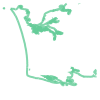

In [84]:
# Extract all the lines from a gdf and combine them into a single MultiLineString
def line_combiner(gdf):
    all_lines = []
    for geom in gdf['geometry']:
        if isinstance(geom, MultiLineString):
            all_lines.extend([line for line in geom.geoms])
        else:  # If it's a LineString
            all_lines.append(geom)

    # Combine all lines into a single MultiLineString
    combined_multiline = MultiLineString(all_lines)

    return combined_multiline

line_combiner(coast_1954)

In [85]:
print(line_combiner(coast_1954))

MULTILINESTRING ((-123.91488 46.7267000000001, -123.9151 46.72665, -123.91527 46.72664, -123.91539 46.72664), (-123.913222 46.726848, -123.91333 46.72677, -123.91344 46.7267000000001, -123.9136 46.72666, -123.91379 46.72668, -123.91408 46.7267000000001, -123.91432 46.72673, -123.91457 46.72672, -123.91485 46.7267000000001, -123.91488 46.7267000000001), (-123.913222 46.744356352941175, -123.91334 46.74428, -123.91357 46.74413, -123.91367 46.74407, -123.91382 46.74402, -123.91394 46.74394, -123.91424 46.74366, -123.91446 46.7435, -123.91463 46.74332, -123.91476 46.74315, -123.91489 46.74308, -123.91508 46.7429, -123.91524 46.74273, -123.91537 46.74253, -123.91542 46.74244, -123.9154 46.7423, -123.91544 46.74222, -123.91561 46.74215, -123.91579 46.74205, -123.91594 46.74193, -123.91605 46.74181, -123.91607 46.74174, -123.91607 46.74167, -123.91607 46.74159, -123.91615 46.74145, -123.91624 46.74136, -123.91637 46.74128, -123.91648 46.74123, -123.91651 46.74113, -123.91645 46.74105, -123.91

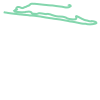

In [95]:
def year_line_gen (geometry, end_year_gdf, current_year, start_year, end_year):

    multiline_comb=line_combiner(end_year_gdf)

    point_collection=line_to_points(geometry)

    #for each point in the point collection, find the nearest point in the 1954 shoreline
    point_pair_list=[]
    for point in point_collection:
        
        point_pair=nearest_points(point, multiline_comb)[1]
        point_pair_list.append(point_pair)
    
    lines = [LineString([point_collection[i],point_pair_list[i]]) for i in range(len(point_pair_list))]

    empty_interpolated_points=[]

    number_of_sections = end_year - start_year

    line_bin=[]

    for line in lines:

        step=line.length/number_of_sections

        interpolated_point = line.interpolate(step*(current_year-start_year))

        line_bin.append(interpolated_point)

    final_line=LineString(line_bin)

    return final_line


year_line_gen(coast_1926.geometry[51],coast_1954,1938,1926,1954)

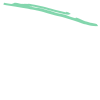

In [98]:
year_line_gen(coast_1926.geometry[51],coast_1954,1950,1926,1954)

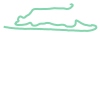

In [97]:
coast_1926.geometry[51]

In [100]:
for year in range(1927,1954):
    #print(year)
    if year==1942:
        continue
    else:
        gdf_new=gpd.GeoDataFrame({'geometry':coast_1926['geometry'].apply(year_line_gen, args=(coast_1954, year,1926,1954)),'layer':str(year)},crs="EPSG:4326")
        gdf_new.to_file("../assets/ECY_estimated_shorelines/Oct1/"+str(year)+".geojson", driver='GeoJSON')


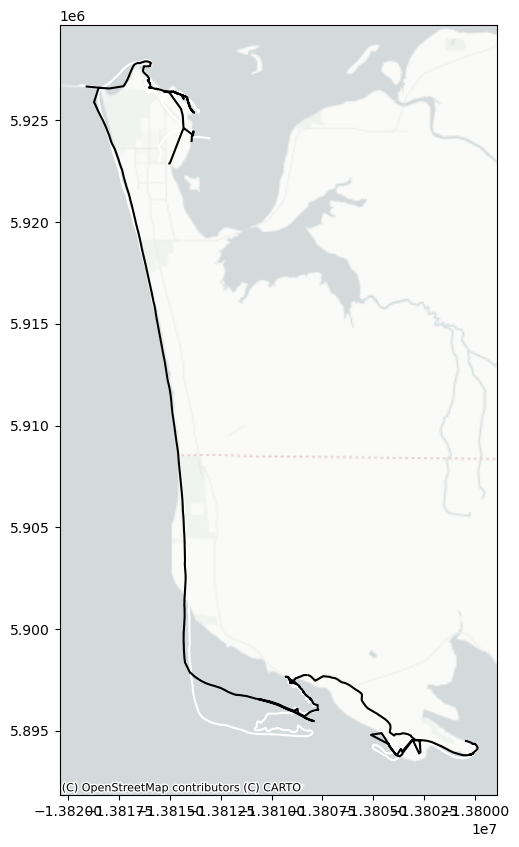

In [103]:
coast_1953=gpd.read_file("../assets/ECY_estimated_shorelines/Oct1/1953.geojson")
line_show(coast_1953)

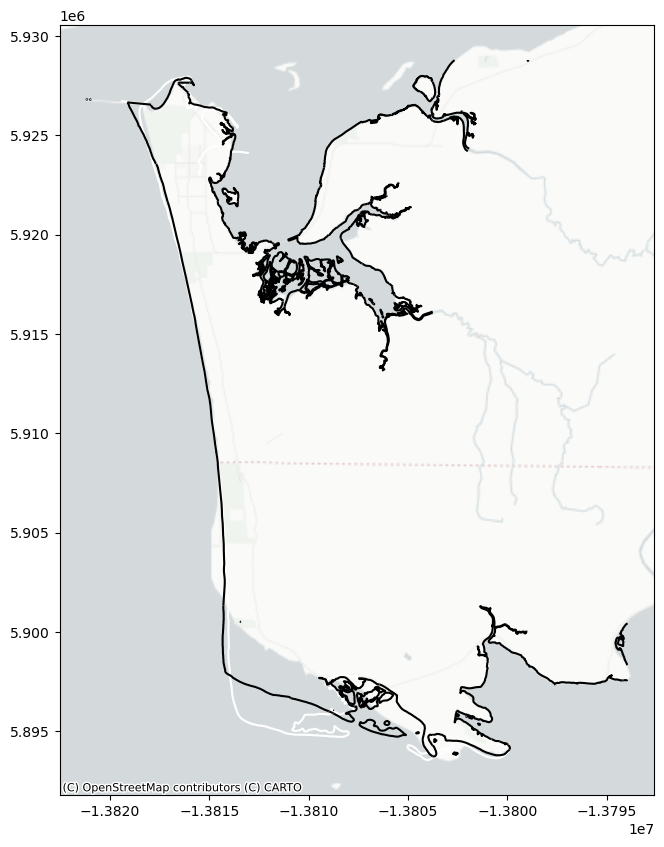

In [104]:
line_show(coast_1954)

In [20]:
#get the list of each point in 1942 coastline
point_list=[]
for geometry in coast_1942['geometry']:
    if isinstance(geometry, MultiLineString):
        for line in geometry.geoms:
            for point in line.coords:
                point_list.append(Point(point))
                
    else:
        for point in geometry.coords:
            point_list.append(Point(point))

point_list
        

[<POINT (-123.987 46.707)>,
 <POINT (-123.986 46.707)>,
 <POINT (-123.985 46.707)>,
 <POINT (-123.984 46.706)>,
 <POINT (-123.983 46.706)>,
 <POINT (-123.983 46.706)>,
 <POINT (-123.981 46.705)>,
 <POINT (-123.981 46.705)>,
 <POINT (-123.979 46.705)>,
 <POINT (-123.979 46.704)>,
 <POINT (-123.978 46.704)>,
 <POINT (-123.977 46.704)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.974 46.703)>,
 <POINT (-123.973 46.703)>,
 <POINT (-123.972 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.969 46.704)>,
 <POINT (-123.968 46.704)>,
 <POINT (-123.967 46.704)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.966 46.705)>,
 <POINT (-123.966 46.705)>,
 <POINT (-123.966 46.706)>,
 <POINT (-123.966 46.706)>,
 <POINT (-123.966 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.707)>,
 <POINT (-123.968 46.7

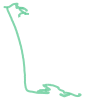

In [77]:
# Extract all the lines from the geometry column
all_lines_1926 = []
for geom in coast_1926['geometry']:
    if isinstance(geom, MultiLineString):
        all_lines_1926.extend(list(geom))
    else:  # If it's a LineString
        all_lines_1926.append(geom)

# Combine all lines into a single MultiLineString
combined_multiline = MultiLineString(all_lines_1926)

combined_multiline


In [23]:
#get the closet point in 1926 coastline to each point on 1942 coastline

closest_point_list=[]
for point in point_list:
    closest_point=nearest_points(point, combined_multiline)[1]
    closest_point_list.append(closest_point)



In [25]:
len(closest_point_list)

457

In [26]:
len(point_list)

457

In [27]:
closest_point_list

[<POINT (-123.987 46.707)>,
 <POINT (-123.986 46.707)>,
 <POINT (-123.986 46.706)>,
 <POINT (-123.985 46.706)>,
 <POINT (-123.984 46.706)>,
 <POINT (-123.983 46.705)>,
 <POINT (-123.982 46.705)>,
 <POINT (-123.981 46.704)>,
 <POINT (-123.98 46.704)>,
 <POINT (-123.979 46.704)>,
 <POINT (-123.978 46.703)>,
 <POINT (-123.977 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.975 46.703)>,
 <POINT (-123.974 46.703)>,
 <POINT (-123.973 46.702)>,
 <POINT (-123.972 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.971 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.97 46.703)>,
 <POINT (-123.969 46.704)>,
 <POINT (-123.968 46.704)>,
 <POINT (-123.967 46.704)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.705)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.967 46.706)>,
 <POINT (-123.968 46.706)>,
 <POINT (-123.968 46.70

In [29]:
#zip the point list and closest point list together
lines = [LineString([point_list[i], closest_point_list[i]]) for i in range(len(point_list))]
lines

[<LINESTRING (-123.987 46.707, -123.987 46.707)>,
 <LINESTRING (-123.986 46.707, -123.986 46.707)>,
 <LINESTRING (-123.985 46.707, -123.986 46.706)>,
 <LINESTRING (-123.984 46.706, -123.985 46.706)>,
 <LINESTRING (-123.983 46.706, -123.984 46.706)>,
 <LINESTRING (-123.983 46.706, -123.983 46.705)>,
 <LINESTRING (-123.981 46.705, -123.982 46.705)>,
 <LINESTRING (-123.981 46.705, -123.981 46.704)>,
 <LINESTRING (-123.979 46.705, -123.98 46.704)>,
 <LINESTRING (-123.979 46.704, -123.979 46.704)>,
 <LINESTRING (-123.978 46.704, -123.978 46.703)>,
 <LINESTRING (-123.977 46.704, -123.977 46.703)>,
 <LINESTRING (-123.975 46.703, -123.975 46.703)>,
 <LINESTRING (-123.975 46.703, -123.975 46.703)>,
 <LINESTRING (-123.975 46.703, -123.975 46.703)>,
 <LINESTRING (-123.974 46.703, -123.974 46.703)>,
 <LINESTRING (-123.973 46.703, -123.973 46.702)>,
 <LINESTRING (-123.972 46.703, -123.972 46.703)>,
 <LINESTRING (-123.971 46.703, -123.971 46.703)>,
 <LINESTRING (-123.971 46.703, -123.971 46.703)>,
 